# 1. Introdução

## RMS Titanic

<p>Foi um navio de transporte de passageiros que partira de Southampton para Nova Iorque sendo sua viagem inaugural em 15 de abril de 1912, no trajeto acabou colidindo com um iceberg ocorrendo uma das maiores tragédias de naufrágios da história. Levou muitas vidas embora pois não havia botes salva-vidas para todos, certos tipos de pessoa acabara sendo privilegiadas na hora da evacução resultando em uma grande chance de sobrevivência.</p>

<h2><center>Dicionário dos Dados</center></h2>

| Variável | Tipo | Explicação |
| --- | --- | --- |
| PassengerId | int | Identificador do passageiro |
| Survived | int| Sobrevivênvia: 1 - Sobreviveu e 0 - Não sobreviveu |
| Pclass | int | Classe de Bilhetes: 1 - Primeira, 2 - Segunda e 3 - Terceira|
| Name | string | Nome do passageiro |
| Sex | string | Gênero do passageiro: Male ou Female |
| Age | float | Idade do passageiro |
| SibSp | int | Número de irmãos/Cônjuges |
| Parch | int | Número de pais/filhos |
| Ticket | string | Número do bilhete |
| Fare | float | Preço do bilhete |
| Cabin | string | Número da cabine |
| Embarked | string | Porto de embarcação |

## Perguntas

## 1) Qual a idade dos passageiros por gênero que sobreviveram?<br>
## 2) Relação entre sobreviventes e a classe de bilhete?<br>
## 3) A classe e o preço do bilhete influenciou na escolha dos sobreviventes?<br>

# 2. Corpo

## Importando Bibliotecas<br>


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Lendo o conjunto de dados<br>

In [92]:
df = pd.read_csv('titanic-data-6.csv')

# 2.1 Exploração

## Olhando 5 primeiras linhas<br>

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Total de linha e colunas do conjunto de dados<br>

In [94]:
df.shape

(891, 12)

## Descrevendo o conjunto de dados<br>

Estatíticas Descritivas: quantidade, média, desvio padrão, mínimo, 1°quartil,  2°quartil, 3° quartil e máximo.<br>

In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Obtendo informações do conjunto de dados <br>

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Quantidade de valores nulos em cada variável <br>

In [97]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.2 Limpeza de Dados

## Renomeando o nome das colunas para minúsculo<br>

In [98]:
df.rename(columns= lambda x : x.lower(), inplace=True)

In [99]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preenchendo os valores nulos da idade com a média das idades<br>

In [100]:
df['age'] = df['age'].fillna(df['age'].mean())

# 2.3 Gráficos

## Função para plotagem do gráfico

In [101]:
def grafico_barra(eixo_x, eixo_y, matiz, dados, titulo, texto_x, texto_y):
    """
      Função para plotagem do gráfico de barras ou count usando a biblioteca seaborn
      Argumentos:
          eixo_x: nome da coluna do cojunto de dados no eixo x do gráfico
          eixo_y: nome da coluna do cojunto de dados no eixo y do gráfico
          matiz: nome da coluna do conjunto de dados representando as diferentes barras do gráfico
          dados: O conjunto de dados.
          titulo: Titulo do gráfico
          texto_x: Texto explicativo do eixo x do gráfico
          texto_y: Texto explicativo do eixo y do gráfico
      Retorno:
          Objeto Axes com o desenho do gráfico nele
    
    """
    plot = sns.barplot(x=eixo_x, y=eixo_y, hue=matiz, data=dados)
    plot.set_title(titulo)
    plot.set_xlabel(texto_x)
    plot.set_ylabel(texto_y)
    
    return plot

## Idade média por Gênero (sex) e Sobrevivência (Survived)<br>

/home/yan-ibti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


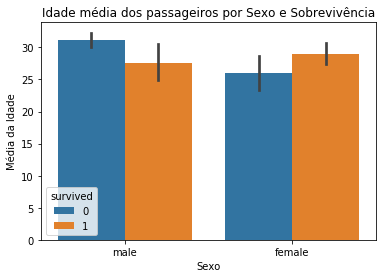

In [102]:
plot = grafico_barra(eixo_x='sex', eixo_y='age', matiz='survived', dados=df, 
                       titulo='Idade média dos passageiros por Sexo e Sobrevivência',
                       texto_x="Sexo",
                       texto_y="Média da Idade"
                      )

## Relação entre Classe de Bilhete (pclass) e se sobreviveu (survived) 

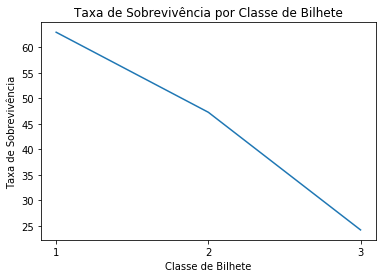

In [103]:
pclass_survived = df.groupby('pclass')['survived'].mean()*100

plt.plot(pclass_survived)
plt.title('Taxa de Sobrevivência por Classe de Bilhete')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe de Bilhete')
plt.xticks([1, 2, 3])
plt.show()

## Gasto das pessoas (fare) por classe de bilhete (pclass) e sobreviventes (survived)<br> 

/home/yan-ibti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


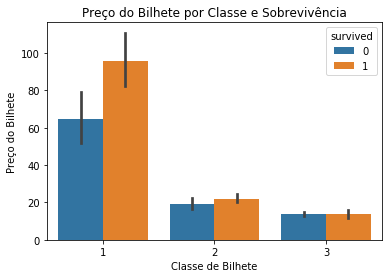

In [104]:
plot = grafico_barra(eixo_x='pclass', 
                       eixo_y='fare',
                       matiz='survived',
                       dados=df, 
                       titulo='Preço do Bilhete por Classe e Sobrevivência', 
                       texto_x='Classe de Bilhete', 
                       texto_y='Preço do Bilhete'
                      )

# 3. Conclusão<br>

Analisando o conjunto de dados sobre o acidente do navio Titanic fica bem claro que as classes superiores foram privilegiadas na hora da evacuação nos botes salva-vidas.

Os passageiros que mais sobreviveram foram do sexo feminino tendo uma idade média de 29 anos enquanto os do sexo masculino que sobreviveram possuem idade média de 28 anos.<br>

Apenas 24% dos passageiros da 3° classe sobreviveram, quanto 47% se salvaram na 2° classe e 63% da 1°.<br>

A escolha dos sobreviventes foi fortemente influenciada pela classe e preço do bilhete quanto mais caro e melhor a chance de sobreviver era maior.<br>

## Limitações

Na fase de exploração do conjunto de dados detectou algumas variáveis candidatas a ser um viéis no processo de análise, não possuindo valores para alguns passageiros. Características detectadas: Age, Cabin e Embarked
<br><br>
Medida tomada:
        * Age: Os valores faltantes foram preenchidos com base na idade média dos passageiros.
        * Cabin: Como esta variável não foi utilizada para análise optou-se por não alterá-la.
        * Embarked: Como esta variável não foi utilizada para análise optou-se por não alterá-la.